# 📊 Partial Dependence Plots (PDPs)

While **feature importance** 🔑 tells us *which* variables matter most for predictions, **partial dependence plots** (PDPs) tell us *how* a feature influences the predictions. 🎯

## Key Questions PDPs Help Answer 🤔
- Controlling for other features, how do **longitude** 🌍 and **latitude** affect house prices 🏠?
- Are predicted health outcomes 🏥 driven by **diet differences** 🍏 or other variables?

> PDPs can be thought of like coefficients in linear or logistic regression ➗ — but more powerful, as they can reveal **non-linear** relationships in complex models. 🔄

---

## How Partial Dependence Works 🔧

- PDPs are computed **after training** a model on real data 📉.
- They isolate the effect of **one feature** at a time, holding all others constant. 🔄

### Example (Soccer ⚽):
- A row of data: team had 50% possession ⚖️, 100 passes, 10 shots, 1 goal.
- We keep everything the same, but **change only one feature** (e.g., ball possession) to different values: 40%, 50%, 60%, etc. 🔄
- For each change, we use the model to **predict the outcome** (e.g., probability of "Man of the Match" 🏅).
- This gives a series of predictions — plotted on a graph with:
  - **X-axis**: values of the selected feature 📏
  - **Y-axis**: average predicted outcome 📈

> To reduce noise from interactions between variables, we **repeat this process for many rows** in the dataset and average the results. 🔄

---

## Summary 📝

Partial dependence plots:
- Help visualize how changing one feature **impacts predictions** ⚡
- Can uncover **non-linear** and **interaction effects** 🔍
- Are useful for model **interpretability** 🧠 and **debugging** 🛠️

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Data manipulation code below here
data = pd.read_csv('new-york-city-taxi-fare-prediction.csv', nrows=50000)

# Remove data with extreme outlier coordinates or negative fares
data = data.query('pickup_latitude > 40.7 and pickup_latitude < 40.8 and ' +
                  'dropoff_latitude > 40.7 and dropoff_latitude < 40.8 and ' +
                  'pickup_longitude > -74 and pickup_longitude < -73.9 and ' +
                  'dropoff_longitude > -74 and dropoff_longitude < -73.9 and ' +
                  'fare_amount > 0'
                  )

y = data.fare_amount

base_features = ['pickup_longitude',
                 'pickup_latitude',
                 'dropoff_longitude',
                 'dropoff_latitude']

X = data[base_features]


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
first_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(train_X, train_y)
print("Data sample:")
data.head()

Data sample:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1


In [18]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000,31289.000000
mean,8.483093,-73.976860,40.756917,-73.975342,40.757473,1.656141
std,4.628164,0.014635,0.018170,0.015917,0.018661,1.284899
min,0.010000,-73.999999,40.700013,-73.999999,40.700020,0.000000
25%,5.500000,-73.988039,40.744947,-73.987125,40.745922,1.000000
50%,7.500000,-73.979691,40.758027,-73.978547,40.758559,1.000000
75%,10.100000,-73.967823,40.769580,-73.966435,40.770427,2.000000
max,165.000000,-73.900062,40.799952,-73.900062,40.799999,6.000000


## Question 1


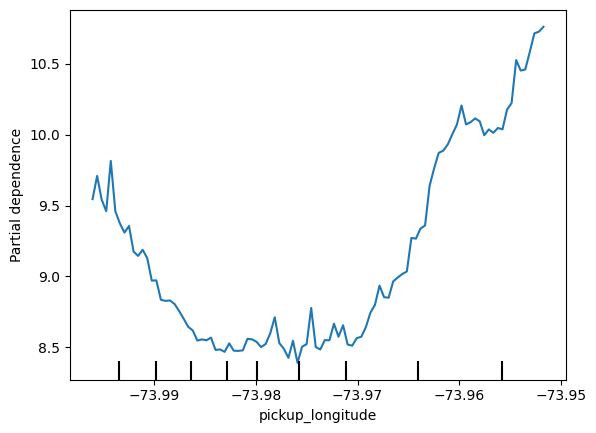

In [19]:
from matplotlib import pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

feat_name = 'pickup_longitude'
PartialDependenceDisplay.from_estimator(first_model, val_X, [feat_name])
plt.show()

Why does the partial dependence plot have this U-shape?
Investigate the other features!

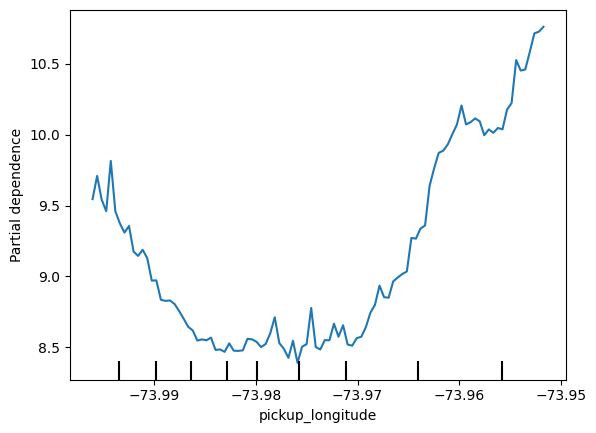

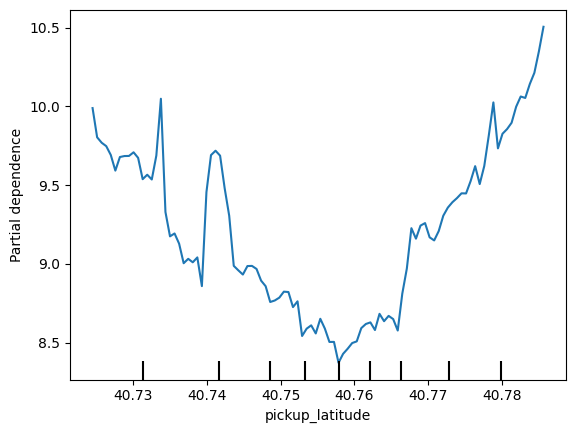

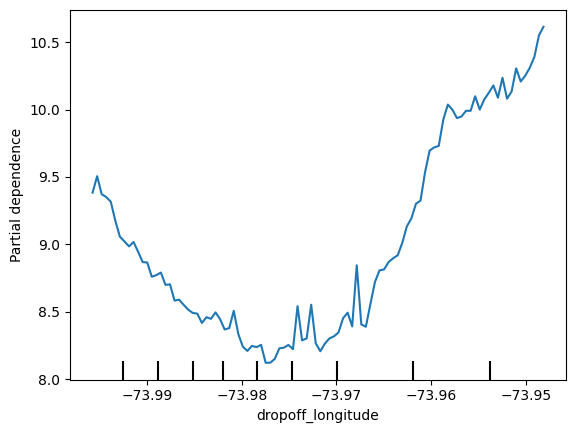

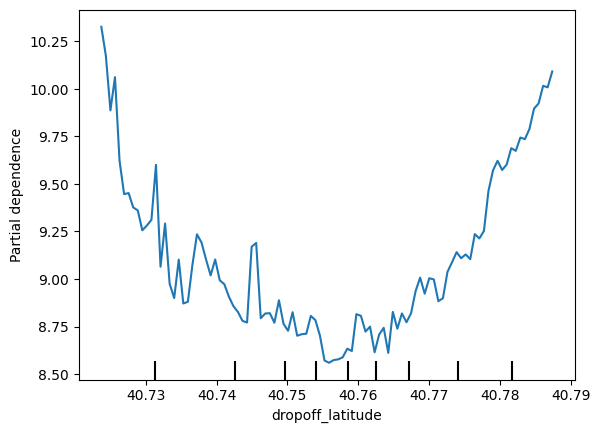

In [20]:
for feat_name in base_features:
    PartialDependenceDisplay.from_estimator(first_model, val_X, [feat_name])
    plt.show()

**Solution**: We have a sense from the permutation importance results that distance is the most important determinant of taxi fare.

This model didn't include distance measures (like absolute change in latitude or longitude) as features, so coordinate features (like pickup_longitude) capture the effect of distance. Being picked up near the center of the longitude values lowers predicted fares on average, because it means shorter trips (on average).

For the same reason, we see the general U-shape in all our partial dependence plots.

## Question 2

Now we will run a 2D partial dependence plot.

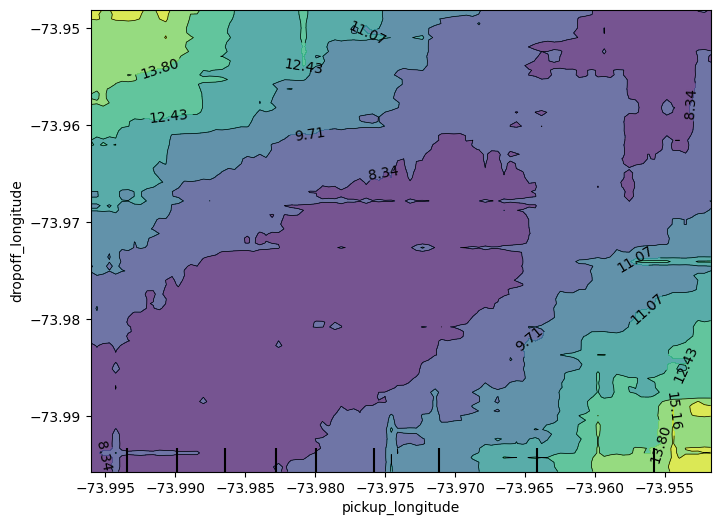

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
fnames = [('pickup_longitude', 'dropoff_longitude')]
PartialDependenceDisplay.from_estimator(first_model, val_X, fnames, ax=ax)
plt.show()

**📝 Solution Summary**: Interpretation of the PDP

You should expect to see **contours running along a diagonal** in the plot. ✅ And indeed, we do see this pattern, although with some interesting nuances! 🔍

### Expected Behavior:
- The diagonal represents **nearby pickup and dropoff longitudes** 🌍, which typically correlate with **shorter trips** 🚗 (when controlling for other factors).
- **As you move further from the central diagonal**, we expect **higher prices** 💵, as the **distances between pickup and dropoff longitudes** increase 🌐.

### The Surprising Observation:
- **Prices increase** as you move towards the **upper-right** of the graph 📈, staying close to that **45-degree line**.
- This might be worth further investigation, but the **impact** of moving to the upper-right of the graph is **small** compared to moving **away from the diagonal line** 📉.

> This result could hint at an additional factor influencing prices that isn’t immediately obvious — worth digging deeper into! 🔍

## Question 3
Consider a ride starting at longitude -73.955 and ending at longitude -74. Using the graph from the last question, estimate how much money the rider would have saved if they'd started the ride at longitude -73.98 instead.

->>About 6. The price decreases from slightly less than 15 to slightly less than 9.

## Question 4


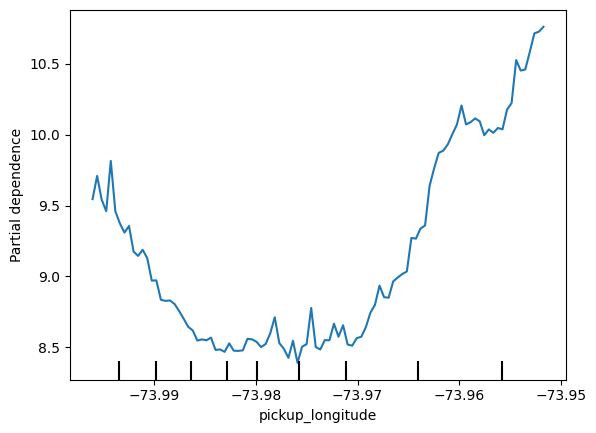

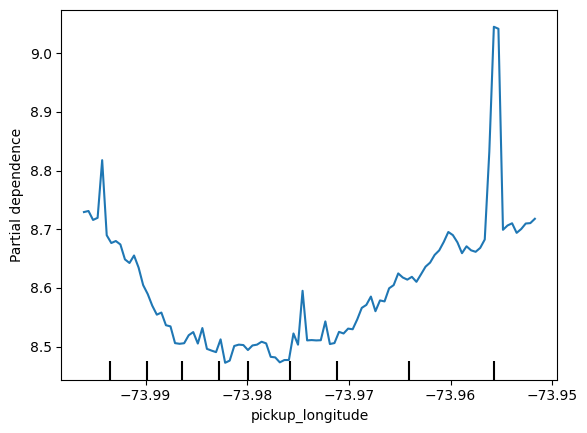

In [22]:
# This is the PDP for pickup_longitude without the absolute difference features. Included here to help compare it to the new PDP you create
feat_name = 'pickup_longitude'
PartialDependenceDisplay.from_estimator(first_model, val_X, [feat_name])
plt.show()

# create new features
data['abs_lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['abs_lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

features_2  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'abs_lat_change',
               'abs_lon_change']

X = data[features_2]
new_train_X, new_val_X, new_train_y, new_val_y = train_test_split(X, y, random_state=1)
second_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(new_train_X, new_train_y)

feat_name = 'pickup_longitude'
disp = PartialDependenceDisplay.from_estimator(second_model, new_val_X, [feat_name])
plt.show()

The difference is that the partial dependence plot became smaller. Both plots have a lowest vertical value of 8.5. But, the highest vertical value in the top chart is around 10.7, and the highest vertical value in the bottom chart is below 9.1. In other words, once we control for absolute distance traveled, the pickup_longitude has a smaller impact on predictions.

## Question 5
Consider a scenario where you have only 2 predictive features, which we will call `feat_A` and `feat_B`. Both features have minimum values of -1 and maximum values of 1.  The partial dependence plot for `feat_A` increases steeply over its whole range, whereas the partial dependence plot for feature B increases at a slower rate (less steeply) over its whole range.

Does this guarantee that `feat_A` will have a higher permutation importance than `feat_B`.  Why or why not?

Solution: No. This doesn't guarantee feat_a is more important. For example, feat_a could have a big effect in the cases where it varies, but could have a single value 99% of the time. In that case, permuting feat_a wouldn't matter much, since most values would be unchanged.

## Question 6


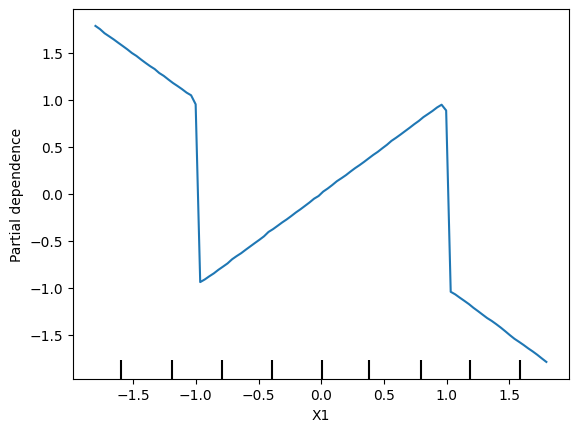

In [ ]:

import eli5
import numpy as np
from numpy.random import rand
from eli5.sklearn import PermutationImportance

n_samples = 20000

# Create array holding predictive feature
X1 = 4 * rand(n_samples) - 2
X2 = 4 * rand(n_samples) - 2

# Create y.
y = np.ones(n_samples)
y = -2 * X1 * (X1<-1) + X1 - 2 * X1 * (X1>1) - X2
# create dataframe 
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)
my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)

disp = PartialDependenceDisplay.from_estimator(my_model, predictors_df, ['X1'])
plt.show()

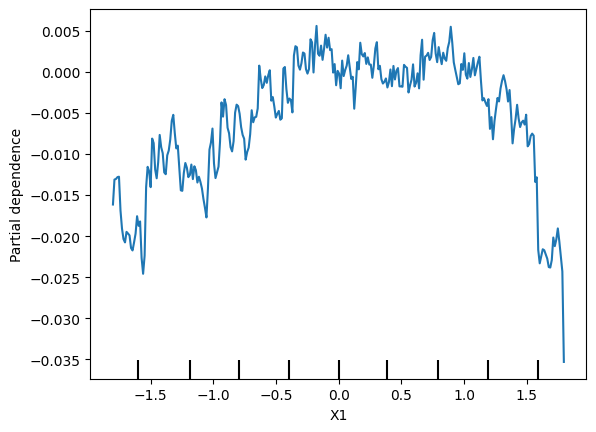

In [24]:

y = X1*X2


# create dataframe because pdp_isolate expects a dataFrame as an argument
my_df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
predictors_df = my_df.drop(['y'], axis=1)

my_model = RandomForestRegressor(n_estimators=30, random_state=1).fit(predictors_df, my_df.y)


disp = PartialDependenceDisplay.from_estimator(my_model, predictors_df, ['X1'], grid_resolution=300)
plt.show()

perm = PermutationImportance(my_model).fit(predictors_df, my_df.y)

In [25]:
import eli5

eli5.show_weights(perm, feature_names = ['X1', 'X2'])

Weight,Feature
2.0002 ± 0.0335,X1
1.9843 ± 0.0343,X2
